<a href="https://colab.research.google.com/github/airborne3586/-Deep-daiv-Tumblbug-Analysis/blob/main/_tumblbug_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### 세팅

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
!pip install scikit_posthocs

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
#utiliser GPU
import torch
device = torch.device("cuda")
torch.cuda.get_device_name(0)

'Tesla T4'

In [ ]:
from google.colab import drive
import pandas as pd

# Google Drive 마운트
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
import seaborn as sns


plt.rc('font', family='NanumBarunGothic')

In [ ]:
# 파일 경로
file_path = '/content/drive/My Drive/Colab Notebooks/[deep daiv.] 텀블벅 분석 /tumblbug_final.csv'

# 데이터 불러오기
df = pd.read_csv(file_path, index_col = 0)
df.head(3)

,category,url,title,subtitle,pick,supporters,reward_levels,like_num,share_num,price,achievement_rate,achievement_goal,funding_period,funding_duration,start_day
0,타이포그래피,https://tumblbug.com/pickmissem,픽미쌤의 격려의 한마디 현수막,교육현장에서 아이들에게 들려주면 좋을 격려의 말들을 따뜻한 그림과 함께 담아낸 현수...,0,537,"['1,000원 +', '14,500원 +', '24,500원 +', '34,500...",36,53,"11,222,500",2244%,500000,2023.12.03 ~ 2023.12.13,10,Sunday
1,타이포그래피,https://tumblbug.com/typo007,"웹툰, 웹소설, 게임 타이틀 [타이포] 이것만 있으면 끝!",타이틀 [타이포] 쉽게 만들기. 폰트에 장식만 붙이면 완성!,0,354,"['1,000원 +', '37,900원 +', '239,000원 +', '459,0...",572,73,"14,090,000",1761%,800000,2023.09.08 ~ 2023.10.16,38,Friday
2,타이포그래피,https://tumblbug.com/glsep_serif_calli,웹툰/웹소설 타이틀을 위한 한글 딩벳 폰트,창작하는 즐거움을 아는 사람들의 작품을 위한 한글 타이틀 폰트 7종,0,531,"['1,000원 +', '20,000원 +', '50,000원 +', '72,000...",828,139,"38,954,000",3895%,1000000,2023.06.02 ~ 2023.07.11,39,Friday


# 1. **전체 1000% 이상 달성 프로젝트 & 아닌 프로젝트 비교 분석**

:  기술통계량으로 분석하는 가설 검정

`가설 1` 펀딩 시작 요일별로 달성률이 다를 것이다.

`가설 2` 펀딩 공유 수, 하트 수가 높을수록 달성률이 높을 것이다. (이하 집단 / 이상 집단 하트 수 공유 수 비교) boxplot

`가설 3` 펀딩 기간이 짧을수록 달성률이 높을 것이다.

## `가설 1` 펀딩 시작 요일별로 달성률이 다를 것이다.

본 분석에서는 우선 1000%이상, 이하 여부에 상관없이 어떤 요일에 가장 성공적인 달성률을 보였는지 분석하고

요일별로 펀딩 달성률에 차이가 있다면, 어떤 요일에 펀딩을 시작하는 것이 효과적인지 알 수 있어 펀딩 전략을 수립하는 데에 도움을 줄 수 있다.

In [ ]:
#필요 컬럼 추출 및 전처리
df_hy1 = df[['start_day', 'achievement_rate']]

df_hy1['achievement_rate'] = df['achievement_rate'].str.replace('%', '').astype(float)


### 표본집단 전체에 대한 분석

#### Boxplot


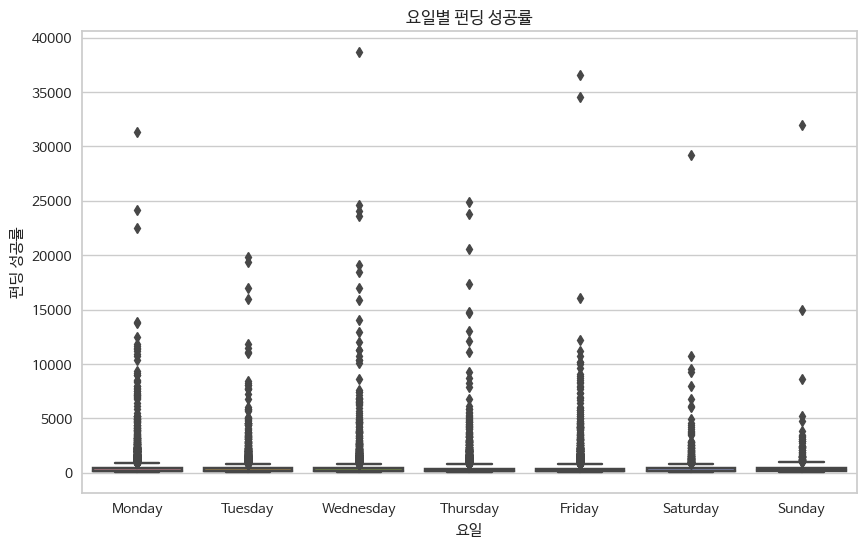

In [ ]:
plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(10, 6))
sns.boxplot(x='start_day', y='achievement_rate', data=df_hy1, order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])

plt.title('요일별 펀딩 성공률')
plt.xlabel('요일')
plt.ylabel('펀딩 성공률')

plt.show()

Boxplot으로는 확인하기 어려울듯 보인다.

#### ANOVA를 통해 유의미한 차이가 있는지 검정(차이)

cf) ANOVA의 기본 가정
1. 정규성
2. 등분산성
3. 독립성

Boxplot으로 육안으로 식별이 불가능 했으므로 통계적으로 요일별 유의미한 차이가 있는지 검정한다.

참고로 ANOVA의 기본 가정을 만족해야 하므로 정규성 검정과 등분산성 검정을 실시한다.

1. 정규성 검정


In [ ]:
from scipy.stats import shapiro

# 각 요일별로 데이터 분리
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
for day in days:
    data = df_hy1[df_hy1['start_day'] == day]['achievement_rate']
    _, p = shapiro(data)
    print(f'{day} - p-value: {p}')


Monday - p-value: 0.0
Tuesday - p-value: 0.0
Wednesday - p-value: 0.0
Thursday - p-value: 0.0
Friday - p-value: 0.0
Saturday - p-value: 0.0
Sunday - p-value: 7.146622168056567e-44


p-value가 유의수준인 0.05보다 크므로 정규성을 만족하지 못한다. 따라서 ANOVA는 여기서 끝낸다.

####  Kruskal-Wallis H test 를 통해 유의미한 차이 검정
비모수적 방법 중 하나인 Kruskal-Wallis H test는 정규성 가정을 필요로 하지 않는다. 이를 사용하면 요일별 달성률의 차이가 통계적으로 유의미한지 검정할 수 있다.

In [ ]:
from scipy.stats import kruskal

# 각 요일별로 데이터를 분리
data = [df_hy1[df_hy1['start_day'] == day]['achievement_rate'] for day in days]

# Kruskal-Wallis H test 수행
_, p = kruskal(*data)
print('Kruskal-Wallis H test - p-value:', p)


Kruskal-Wallis H test - p-value: 0.0005215349433006532


p-value가 유의수준인 0.05보다 작으므로 유의미한 차이가 있다고 가정할 수 있다.


### 가장 펀딩 달성률이 좋은 요일과 안좋은 요일은 언제일까?

이상치 제거 전

In [ ]:
# 각 요일별 달성률의 평균 계산
average_achievement_rate = df_hy1.groupby('start_day')['achievement_rate'].mean()

# 평균 달성률이 가장 높은 요일
best_day = average_achievement_rate.idxmax()
best_rate = average_achievement_rate.max()

# 평균 달성률이 가장 낮은 요일
worst_day = average_achievement_rate.idxmin()
worst_rate = average_achievement_rate.min()

print(f"펀딩 달성률이 가장 좋은 요일은 {best_day}이며, 평균 달성률은 {best_rate:.2f}이다.")
print(f"펀딩 달성률이 가장 안 좋은 요일은 {worst_day}이며, 평균 달성률은 {worst_rate:.2f}이다.")

# 각 요일별 달성률의 평균을 계산
average_achievement_rate = df_hy1.groupby('start_day')['achievement_rate'].mean()

# 각 요일별 평균 달성률을 출력
print("*"*100)
for day, rate in average_achievement_rate.items():
    print(f"{day}의 평균 달성률은 {rate:.2f}")



펀딩 달성률이 가장 좋은 요일은 Sunday이며, 평균 달성률은 542.57이다.
펀딩 달성률이 가장 안 좋은 요일은 Tuesday이며, 평균 달성률은 464.00이다.
****************************************************************************************************
Friday의 평균 달성률은 477.02
Monday의 평균 달성률은 498.38
Saturday의 평균 달성률은 473.64
Sunday의 평균 달성률은 542.57
Thursday의 평균 달성률은 464.19
Tuesday의 평균 달성률은 464.00
Wednesday의 평균 달성률은 504.45


 이상치 제거 후

In [ ]:
# IQR 계산
Q1 = df_hy1['achievement_rate'].quantile(0.25)
Q3 = df_hy1['achievement_rate'].quantile(0.75)
IQR = Q3 - Q1

# IQR을 사용하여 이상치를 제거
filtered_df = df_hy1[~((df_hy1['achievement_rate'] < (Q1 - 1.5 * IQR)) |(df_hy1['achievement_rate'] > (Q3 + 1.5 * IQR)))]

# 이상치를 제거한 데이터에서 각 요일별 달성률의 평균 계산
average_achievement_rate = filtered_df.groupby('start_day')['achievement_rate'].mean()

# 평균 달성률이 가장 높은 요일
best_day = average_achievement_rate.idxmax()
best_rate = average_achievement_rate.max()

# 평균 달성률이 가장 낮은 요일
worst_day = average_achievement_rate.idxmin()
worst_rate = average_achievement_rate.min()

print(f"펀딩 달성률이 가장 좋은 요일은 {best_day}이며, 평균 달성률은 {best_rate:.2f}이다.")
print(f"펀딩 달성률이 가장 안 좋은 요일은 {worst_day}이며, 평균 달성률은 {worst_rate:.2f}이다.")

print('*'*100)
# 각 요일별 평균 달성률을 출력
for day, rate in average_achievement_rate.items():
    print(f"{day}의 평균 달성률은 {rate:.2f}")


펀딩 달성률이 가장 좋은 요일은 Sunday이며, 평균 달성률은 250.83이다.
펀딩 달성률이 가장 안 좋은 요일은 Thursday이며, 평균 달성률은 229.15이다.
****************************************************************************************************
Friday의 평균 달성률은 232.24
Monday의 평균 달성률은 242.53
Saturday의 평균 달성률은 236.90
Sunday의 평균 달성률은 250.83
Thursday의 평균 달성률은 229.15
Tuesday의 평균 달성률은 232.16
Wednesday의 평균 달성률은 230.77


이상치 제거 전, 후 모두 일요일에 가장 높은 평균 달성률을 보였으며, 이상치 제거 전에는 압도적으로 일요일에 펀딩을 시작하는 것이 높은 달성률을 보였다. 이상치 제거 후에는 압도적으로 높은 수치를 보이진 않지만 달성률이 최소 8%p이상의 차이를 보였다.

###(번외) 가장 펀딩 금액이 좋은 요일과 안좋은 요일은 언제일까?

In [ ]:
df_hy1_1 = df[['start_day', 'price']]
df_hy1_1['price'] = df['price'].str.replace(',', '').astype(float)

이상치 제거 전

In [ ]:
# 각 요일별 달성률의 평균 계산
average_price = df_hy1_1.groupby('start_day')['price'].mean()

# 평균 달성금액이 가장 높은 요일
best_day = average_price.idxmax()
best_rate = average_price.max()

# 평균 달성금액이 가장 낮은 요일
worst_day = average_price.idxmin()
worst_rate = average_price.min()

print(f"펀딩 금액이 가장 좋은 요일은 {best_day}이며, 평균 달성금액은 {best_rate:.2f}이다.")
print(f"펀딩 금액이 가장 안 좋은 요일은 {worst_day}이며, 평균 달성금액은 {worst_rate:.2f}이다.")

# 각 요일별 달성 금액의 평균을 계산
average_price = df_hy1_1.groupby('start_day')['price'].mean()

sorted_average_price = sorted(average_price.items(), key=lambda x: x[1], reverse=True)

for day, rate in sorted_average_price:
    print(f"{day}의 평균 달성금액은 {rate:.2f}")


펀딩 금액이 가장 좋은 요일은 Saturday이며, 평균 달성금액은 7257451.18이다.
펀딩 금액이 가장 안 좋은 요일은 Sunday이며, 평균 달성금액은 5687452.44이다.
Saturday의 평균 달성금액은 7257451.18
Wednesday의 평균 달성금액은 6981551.71
Monday의 평균 달성금액은 6948903.22
Friday의 평균 달성금액은 6821373.29
Thursday의 평균 달성금액은 6419844.75
Tuesday의 평균 달성금액은 6019060.78
Sunday의 평균 달성금액은 5687452.44


 이상치 제거 후

In [ ]:
# IQR 계산
Q1 = df_hy1_1['price'].quantile(0.25)
Q3 = df_hy1_1['price'].quantile(0.75)
IQR = Q3 - Q1

# IQR을 사용하여 이상치를 제거
filtered_df = df_hy1_1[~((df_hy1_1['price'] < (Q1 - 1.5 * IQR)) |(df_hy1_1['price'] > (Q3 + 1.5 * IQR)))]

# 이상치를 제거한 데이터에서 각 요일별 달성률의 평균 계산
average_price = filtered_df.groupby('start_day')['price'].mean()


# 평균 달성금액이 가장 높은 요일
best_day = average_price.idxmax()
best_rate = average_price.max()

# 평균 달성금액이 가장 낮은 요일
worst_day = average_price.idxmin()
worst_rate = average_price.min()

print(f"펀딩 금액이 가장 좋은 요일은 {best_day}이며, 평균 달성금액은 {best_rate:.2f}이다.")
print(f"펀딩 금액이 가장 안 좋은 요일은 {worst_day}이며, 평균 달성금액은 {worst_rate:.2f}이다.")



# 각 요일별 평균 금액 출력
print("*"*100)
sorted_average_price = sorted(average_price.items(), key=lambda x: x[1], reverse=True)

for day, rate in sorted_average_price:
    print(f"{day}의 평균 달성금액은 {rate:.2f}")


펀딩 금액이 가장 좋은 요일은 Sunday이며, 평균 달성금액은 2906868.68이다.
펀딩 금액이 가장 안 좋은 요일은 Saturday이며, 평균 달성금액은 2793943.74이다.
****************************************************************************************************
Sunday의 평균 달성금액은 2906868.68
Tuesday의 평균 달성금액은 2893061.00
Friday의 평균 달성금액은 2878296.57
Monday의 평균 달성금액은 2868166.47
Thursday의 평균 달성금액은 2831222.44
Wednesday의 평균 달성금액은 2811771.09
Saturday의 평균 달성금액은 2793943.74


이상치 제거 전, 후 모두 일요일에 가장 높은 평균 달성률을 보였으며, 이상치 제거 전에는 압도적으로 일요일에 펀딩을 시작하는 것이 높은 달성률을 보였다. 이상치 제거 후에는 압도적으로 높은 수치를 보이진 않지만 달성률이 최소 8%p이상의 차이를 보였다.

## 가설 2 펀딩 공유 수, 하트 수가 높을수록 달성률이 높을 것이다.

어떻게 보면 당연하게 들릴 수도 있는 말이다. 하지만 이를 데이터를 통해 확인해 본다.

또한 1000% 이상의 달성률 집단과 아닌 집단의 차이를 검정한다

In [ ]:
#필요 컬럼 정의
df_hy2 = df[['share_num', 'like_num']]
df_hy2['achievement_rate'] = df['achievement_rate'].str.replace('%', '').astype(float)

### 표본 집단 전체에 대한 분석 (실패)

#### 상관관계 확인

In [ ]:
correlation = df_hy2[['share_num', 'like_num', 'achievement_rate']].corr()

print(correlation)

                  share_num  like_num  achievement_rate
share_num          1.000000 -0.003149          0.344567
like_num          -0.003149  1.000000         -0.009070
achievement_rate   0.344567 -0.009070          1.000000


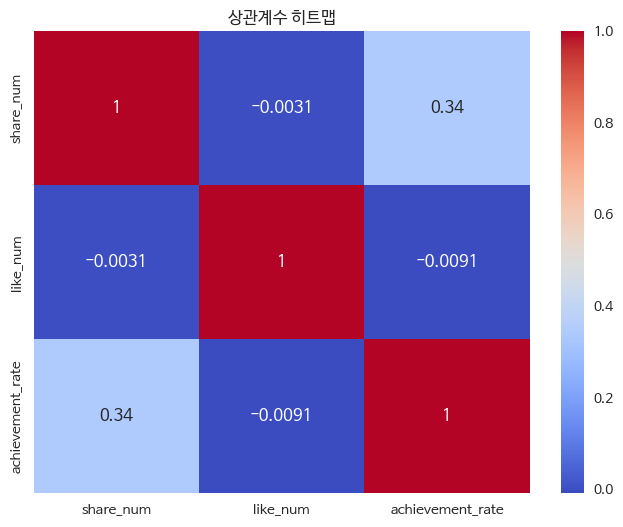

In [ ]:
plt.rc('font', family='NanumBarunGothic')
# 히트맵 생성
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')

plt.title('상관계수 히트맵')
plt.show()

달성률에 대한 상관관계를 볼때 공유수는 약간 영향을 미치는듯 하지만 좋아요는 전혀 영향을 미치지 않는 것처럼 보인다. 따라서 추가적인 분석을 통해 확인한다

#### 회귀분석(독립변수가 유의한가?)

OLS 확인전 기본 가정을 확인해본다.

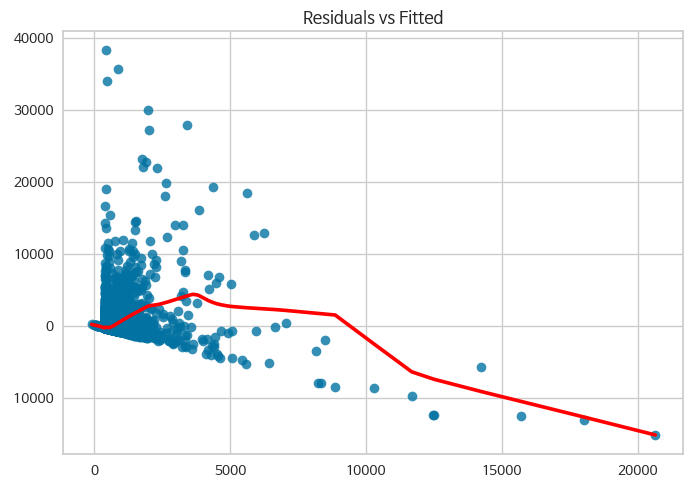

Durbin-Watson: 0.7585890297794896


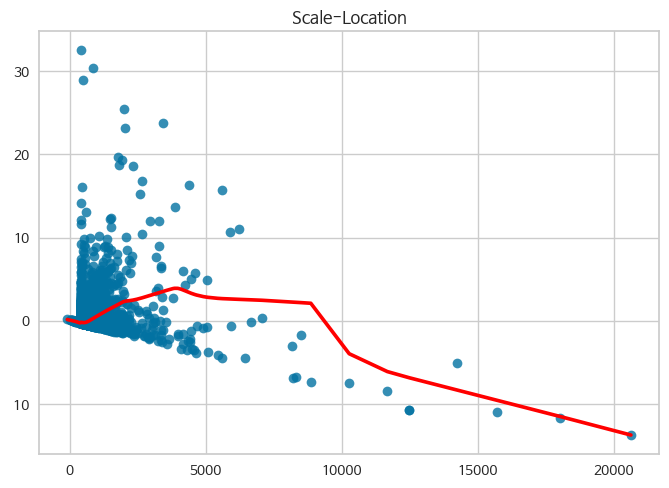

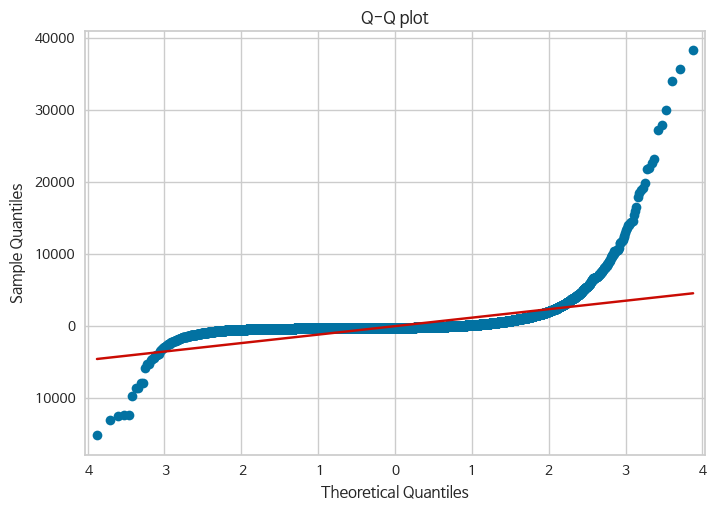

   VIF Factor   features
0    1.045808      const
1    1.000010  share_num
2    1.000010   like_num


In [ ]:
import statsmodels.api as sm
import statsmodels.stats.api as sms
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 회귀분석 모델 생성 및 학습
X = df_hy2[['share_num', 'like_num']]
Y = df_hy2['achievement_rate']
X = sm.add_constant(X)
model = sm.OLS(Y, X)
results = model.fit()

# 선형성: 적합값(fitted)와 잔차(residual) 그래프
fitted = results.predict(X)
residual = results.resid
sns.regplot(x=fitted, y=residual, lowess=True, line_kws={'color': 'red'})
plt.title('Residuals vs Fitted')
plt.show()

# 독립성: Durbin-Watson 통계량 계산
dw = sm.stats.stattools.durbin_watson(results.resid)
print(f'Durbin-Watson: {dw}')

# 등분산성: 적합값과 표준화 잔차 그래프
std_residual = results.get_influence().resid_studentized_internal
sns.regplot(x=fitted, y=std_residual, lowess=True, line_kws={'color': 'red'})
plt.title('Scale-Location')
plt.show()

# 정규성: QQ Plot
sm.ProbPlot(results.resid).qqplot(line='s')
plt.title('Q-Q plot')
plt.show()

# 다중공선성: VIF 계산
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(vif)

plt.rc('font', family='NanumBarunGothic')

결론 적으로 말하면 OLS를 통해서 변수의 유의미 함을 판단하지 못할거같다.

### 달성률 1000% 이상 집단과 미만 집단 비교

#### Boxplot

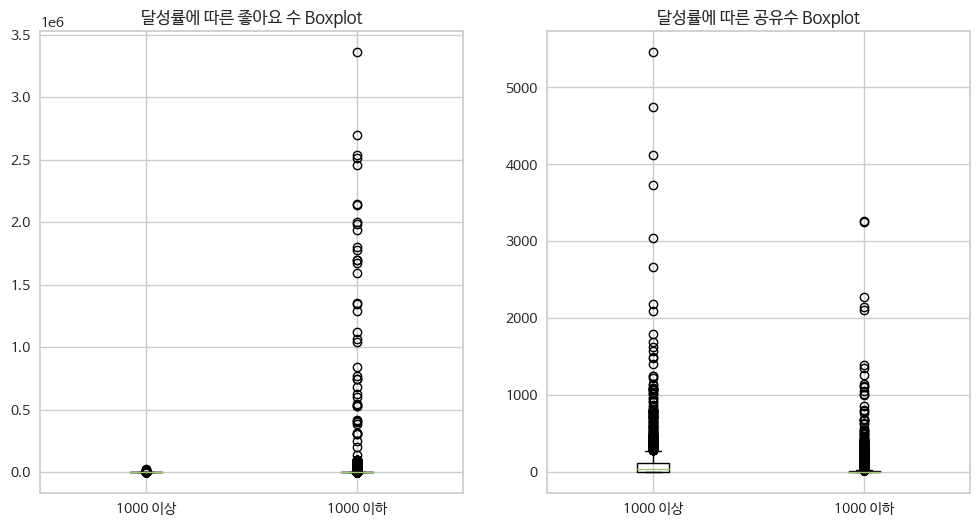

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

#데이터 분할
df_high = df_hy2[df_hy2['achievement_rate'] >= 1000]
df_low = df_hy2[df_hy2['achievement_rate'] < 1000]

# 좋아요에 대한 Boxplot
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.boxplot([df_high['like_num'], df_low['like_num']], labels=['1000 이상', '1000 이하'])
plt.title('달성률에 따른 좋아요 수 Boxplot')

# 공유수에 대한 Boxplot
plt.subplot(1,2,2)
plt.boxplot([df_high['share_num'], df_low['share_num']], labels=['1000 이상', '1000 이하'])
plt.title('달성률에 따른 공유수 Boxplot')

plt.show()


이상치 때문에 해석하기가 힘들다. 그런데 왜 좋아요 수 Boxplot에서 1000이상이 더 좋아요가 낮게 보이는 걸까?

우선 로그 변환해서 확인해본다

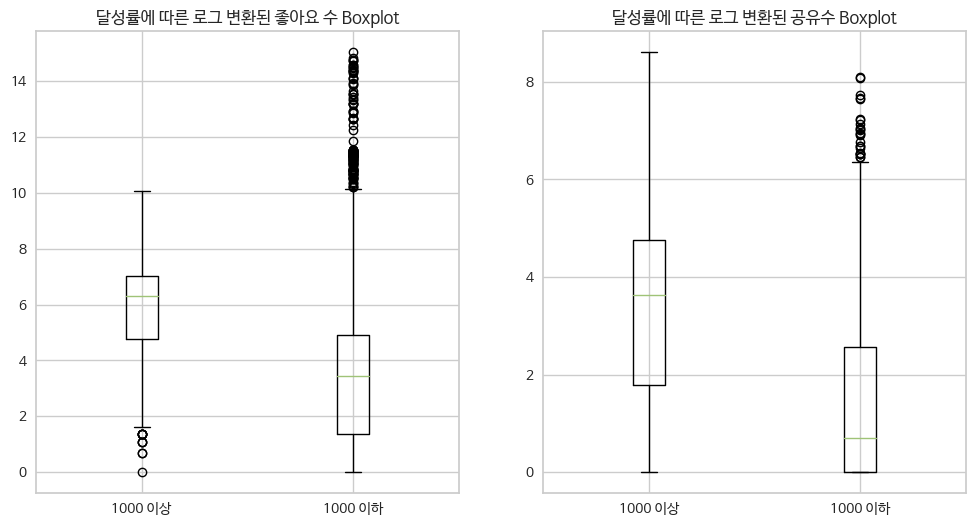

In [ ]:
import numpy as np

# 로그 변환을 적용
df_high['like_num_log'] = np.log1p(df_high['like_num'])
df_low['like_num_log'] = np.log1p(df_low['like_num'])
df_high['share_num_log'] = np.log1p(df_high['share_num'])
df_low['share_num_log'] = np.log1p(df_low['share_num'])

# 좋아요에 대한 Boxplot
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.boxplot([df_high['like_num_log'], df_low['like_num_log']], labels=['1000 이상', '1000 이하'])
plt.title('달성률에 따른 로그 변환된 좋아요 수 Boxplot')

# 공유수에 대한 Boxplot
plt.subplot(1,2,2)
plt.boxplot([df_high['share_num_log'], df_low['share_num_log']], labels=['1000 이상', '1000 이하'])
plt.title('달성률에 따른 로그 변환된 공유수 Boxplot')

plt.show()


당연한 결과다..

### (번외) 달성금액 관련
앱 웹 서비스 관련

In [ ]:
#필요 컬럼 정의
df_hy2 = df[['share_num', 'like_num']]
df_hy2['price'] = df['price'].str.replace(',', '').astype(float)

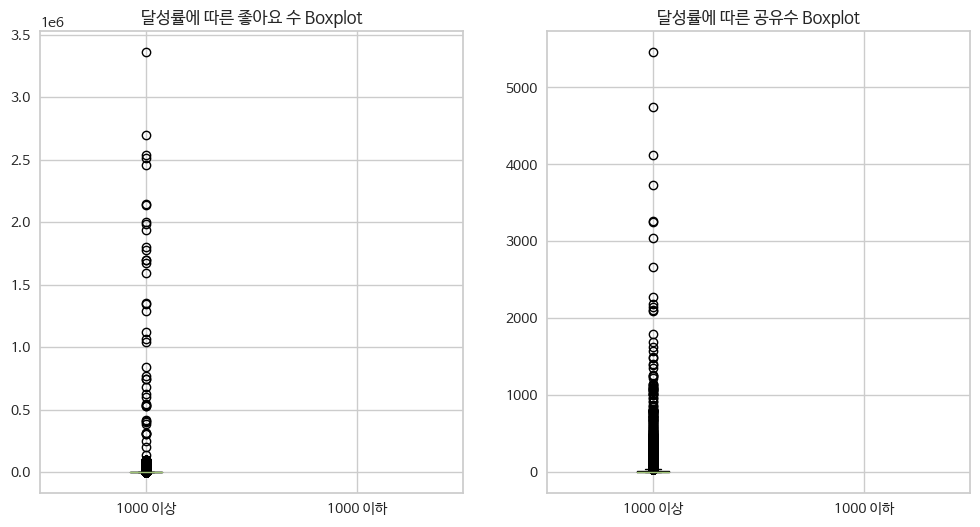

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

#데이터 분할
df_high = df_hy2[df_hy2['price'] >= 1000]
df_low = df_hy2[df_hy2['price'] < 1000]

# 좋아요에 대한 Boxplot
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.boxplot([df_high['like_num'], df_low['like_num']], labels=['1000 이상', '1000 이하'])
plt.title('달성률에 따른 좋아요 수 Boxplot')

# 공유수에 대한 Boxplot
plt.subplot(1,2,2)
plt.boxplot([df_high['share_num'], df_low['share_num']], labels=['1000 이상', '1000 이하'])
plt.title('달성률에 따른 공유수 Boxplot')

plt.show()


이상치 때문에 해석하기가 힘들다. 그런데 왜 좋아요 수 Boxplot에서 1000이상이 더 좋아요가 낮게 보이는 걸까?

우선 로그 변환해서 확인해본다

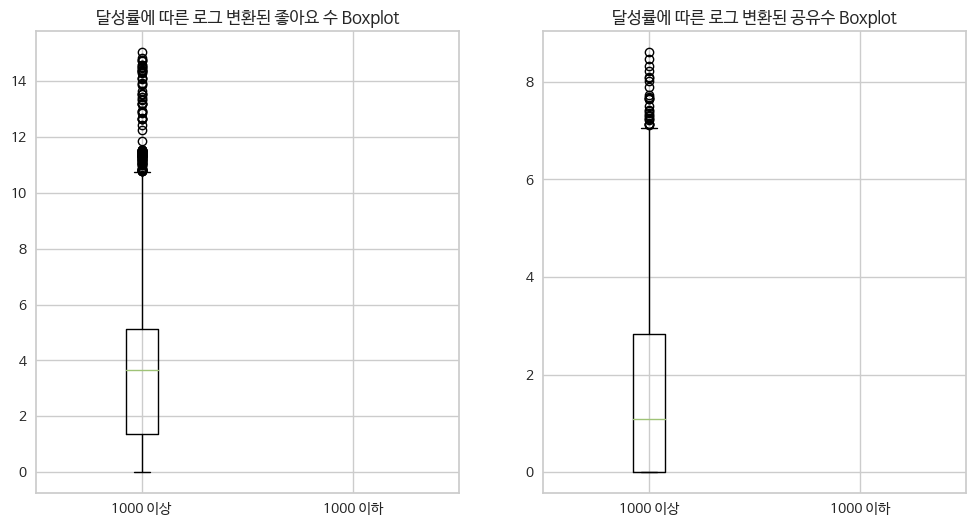

In [ ]:
import numpy as np

# 로그 변환을 적용
df_high['like_num_log'] = np.log1p(df_high['like_num'])
df_low['like_num_log'] = np.log1p(df_low['like_num'])
df_high['share_num_log'] = np.log1p(df_high['share_num'])
df_low['share_num_log'] = np.log1p(df_low['share_num'])

# 좋아요에 대한 Boxplot
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.boxplot([df_high['like_num_log'], df_low['like_num_log']], labels=['1000 이상', '1000 이하'])
plt.title('달성률에 따른 로그 변환된 좋아요 수 Boxplot')

# 공유수에 대한 Boxplot
plt.subplot(1,2,2)
plt.boxplot([df_high['share_num_log'], df_low['share_num_log']], labels=['1000 이상', '1000 이하'])
plt.title('달성률에 따른 로그 변환된 공유수 Boxplot')

plt.show()


### `가설 3` 펀딩 기간이 짧을수록 달성률이 높을 것이다.

과연 펀딩 기간이 달성률에 영향을 줄 가능성이 있을까?

In [ ]:
df.columns

Index(['category', 'url', 'title', 'subtitle', 'pick', 'supporters',
       'reward_levels', 'like_num', 'share_num', 'price', 'achievement_rate',
       'achievement_goal', 'funding_period', 'funding_duration', 'start_day'],
      dtype='object')

In [ ]:
df_hy3 = df[['funding_duration']]
df_hy3['achievement_rate'] = df['achievement_rate'].str.replace('%', '').astype(float)

### 표본 집단 전체에 대한 분석

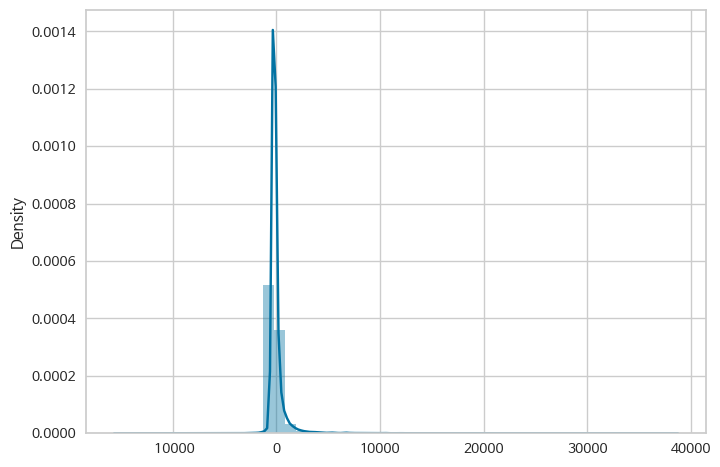

Shapiro-Wilk Test: ShapiroResult(statistic=0.2893723249435425, pvalue=0.0)


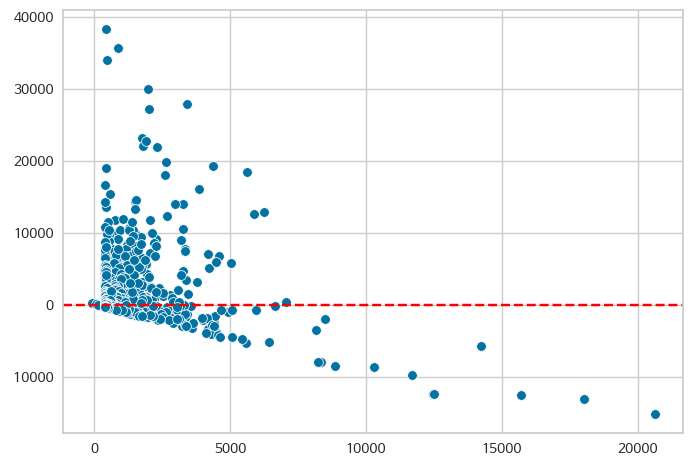

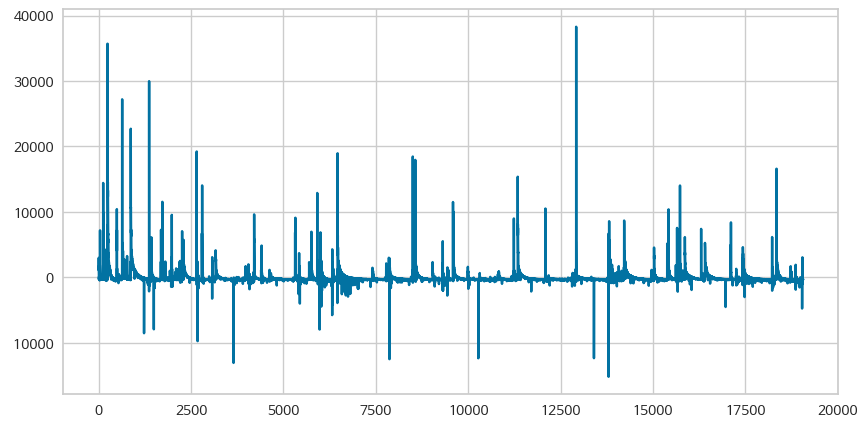

Durbin-Watson: 0.7585890297794896


In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# 잔차
residuals = results.resid

# 정규성 검정
sns.distplot(residuals)
plt.show()
print('Shapiro-Wilk Test:', stats.shapiro(residuals))

# 등분산성 검정
sns.scatterplot(x=results.fittedvalues, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.show()


# 독립성 검정
plt.figure(figsize=(10, 5))
plt.plot(residuals)
plt.show()
print('Durbin-Watson:', sm.stats.durbin_watson(residuals))


이것도 기본 가정을 만족하지 못하므로 사용하지 못할 것 같다..

### 달성률 1000% 이상 집단과 미만 집단 비교

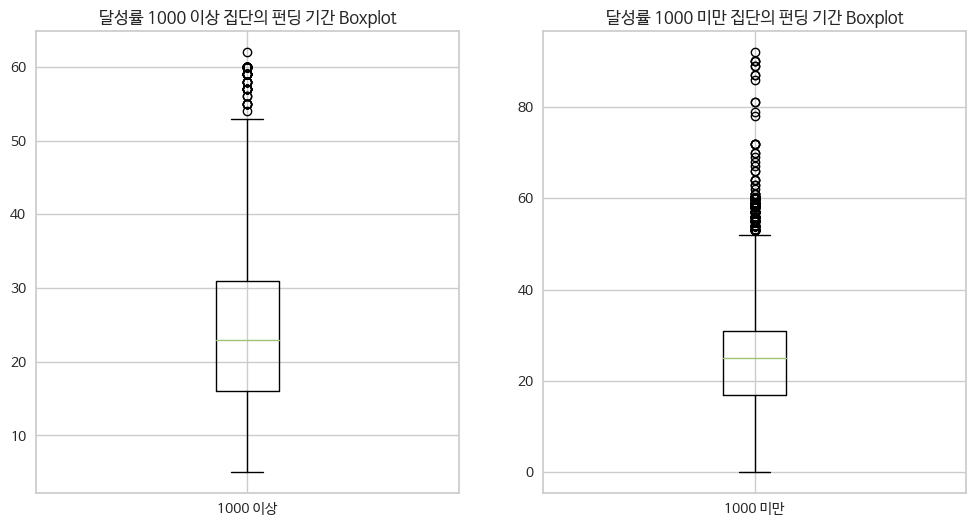

In [ ]:
# 달성률이 1000 이상인 집단과 미만인 집단으로 데이터를 분리
df_high = df_hy3[df_hy3['achievement_rate'] >= 1000]
df_low = df_hy3[df_hy3['achievement_rate'] < 1000]

# 펀딩 기간에 대한 Boxplot을 그립니다.
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.boxplot([df_high['funding_duration']], labels=['1000 이상'])
plt.title('달성률 1000 이상 집단의 펀딩 기간 Boxplot')

plt.subplot(1,2,2)
plt.boxplot([df_low['funding_duration']], labels=['1000 미만'])
plt.title('달성률 1000 미만 집단의 펀딩 기간 Boxplot')

plt.show()

겉보기에는 달성률이 1000% 이상인 집단이 좀더 펀딩기간이 길게 분포되어 있는 것을 볼 수 있다.

히스토그램을 겹쳐볼까?
두 집단의 개수에 차이가 있으므로 y축을 밀도로 설정하여 확인한다

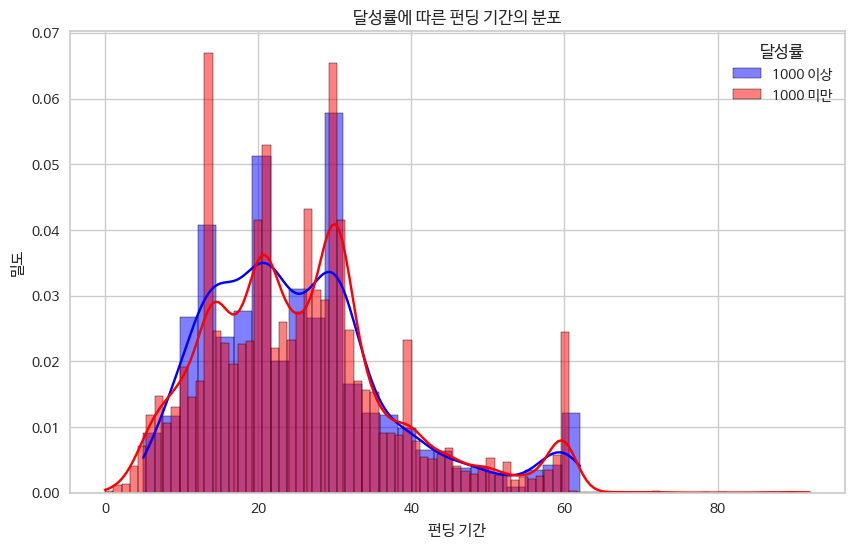

In [ ]:
plt.figure(figsize=(10,6))

# 달성률이 1000 이상인 집단의 히스토그램
sns.histplot(df_high['funding_duration'], color='blue', kde=True, label='1000 이상', stat='density')

# 달성률이 1000 미만인 집단의 히스토그램
sns.histplot(df_low['funding_duration'], color='red', kde=True, label='1000 미만', stat='density')

plt.legend(title='달성률')
plt.title('달성률에 따른 펀딩 기간의 분포')
plt.xlabel('펀딩 기간')
plt.ylabel('밀도')
plt.show()


##가설3-2 펀딩기간과 달성금액과의 관계

과연 펀딩 기간이 달성금액에 영향을 줄 가능성이 있을까?

In [ ]:
df.columns

Index(['category', 'url', 'title', 'subtitle', 'pick', 'supporters',
       'reward_levels', 'like_num', 'share_num', 'price', 'achievement_rate',
       'achievement_goal', 'funding_period', 'funding_duration', 'start_day'],
      dtype='object')

In [ ]:
# '앱 · 웹 서비스'를 포함하는 데이터 프레임
df_app= df[df['category'] == '앱 · 웹 서비스']
df_app['price'] = df['price'].str.replace(',', '').astype(float)




### 산점도

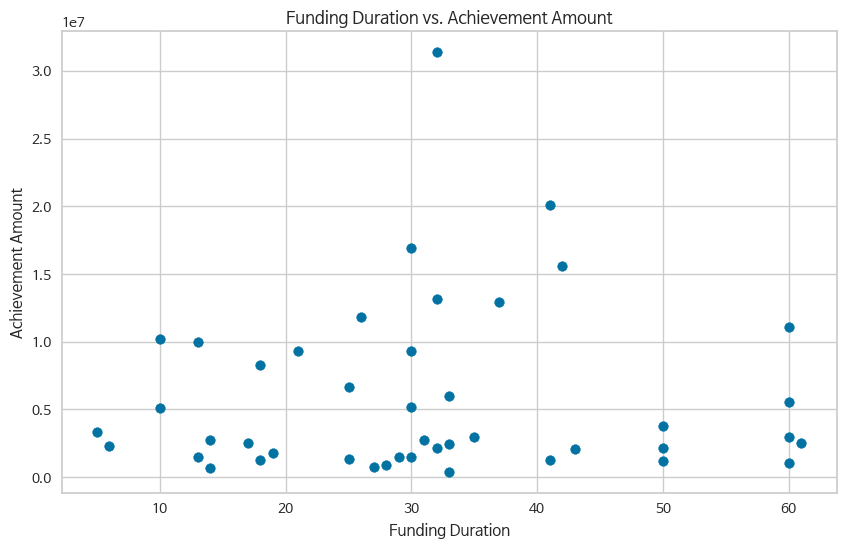

In [ ]:
import matplotlib.pyplot as plt

# 산점도 그리기
plt.figure(figsize=(10, 6))
plt.scatter(df_app['funding_duration'], df_app['price'])

plt.title('Funding Duration vs. Achievement Amount')
plt.xlabel('Funding Duration')
plt.ylabel('Achievement Amount')
plt.show()


# 2. 다이브 매거진과 같은 카테고리를 가진 프로젝트들끼리 세부 분석

## 목표 금액 비교 - 잡지

In [ ]:
# '잡지'의 개수 확인
app_web_count = df[df['category'] == '잡지'].shape[0]
print("'잡지'의 개수: ", app_web_count)

# '앱 · 웹 서비스'를 포함하는 데이터 프레임
df_magazine= df[df['category'] == '잡지']
df_magazine['achievement_rate'] = df['achievement_rate'].str.replace('%', '').astype(float)

'잡지'의 개수:  637


In [ ]:
# 달성률이 1000 이상인 집단과 미만인 집단으로 데이터를 분리
df_high = df_magazine[df_magazine['achievement_rate'] >= 1000]
df_low = df_magazine[df_magazine['achievement_rate'] < 1000]

len(df_high)


2

잡지 부문에서 달성률 1000이상이 2개..? 이러면 1000 이상 미만의 비교분석은 어려울 듯 보인다

그러면 달성률에 따른 목표금액을 산점도로 확인해보자.

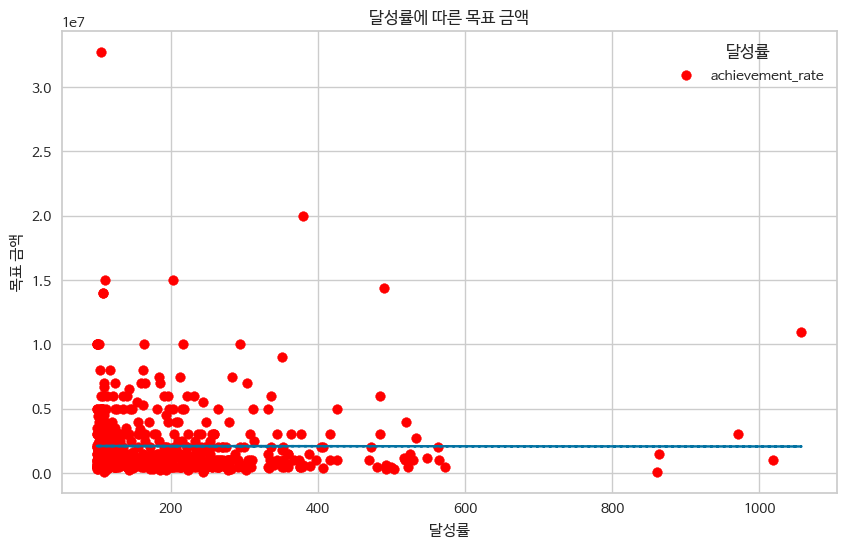

In [ ]:
plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(10,6))

# 산점도 및 추세선
plt.scatter(df_magazine['achievement_rate'], df_magazine['achievement_goal'], color='red', label='achievement_rate')
z = np.polyfit(df_magazine['achievement_rate'], df_magazine['achievement_goal'], 1)
p = np.poly1d(z)
plt.plot(df_magazine['achievement_rate'], p(df_magazine['achievement_rate']), "b--")

plt.legend(title='달성률')
plt.title('달성률에 따른 목표 금액')
plt.xlabel('달성률')
plt.ylabel('목표 금액')
plt.show()


유의미하게 보이지 않는다..

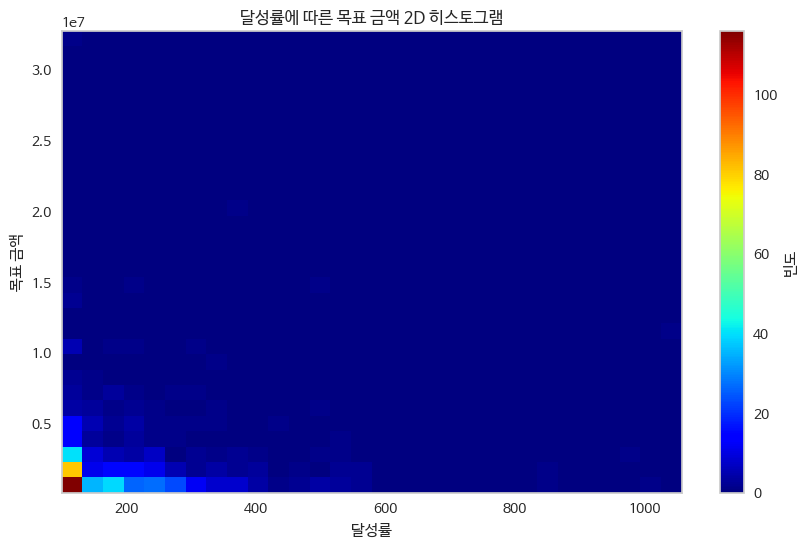

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(10,6))

# 2D 히스토그램
plt.hist2d(df_magazine['achievement_rate'], df_magazine['achievement_goal'], bins=(30,30), cmap=plt.cm.jet)

plt.colorbar(label='빈도')
plt.title('달성률에 따른 목표 금액 2D 히스토그램')
plt.xlabel('달성률')
plt.ylabel('목표 금액')

plt.show()


## Pick이 붙은 것과 안붙은 것.

에디터 픽이 붙은 프로젝트가 있고 안붙은 프로젝트가 있다. 이들 간의 차이를 확인해본다.

우선 pick에  영향을 미치는 변수들을 확인해본다

#### 설정

### autoML을 통한 pick 변수에 대한 변수 중요도 확인

In [ ]:
df_autoML = df
df_autoML['pick'] = df_autoML['pick'].apply(lambda x: 'pick' if x == 1 else 'x')


,Description,Value
0,Session id,3135
1,Target,pick
2,Target type,Binary
3,Target mapping,"pick: 0, x: 1"
4,Original data shape,"(19064, 15)"
5,Transformed data shape,"(19064, 21)"
6,Transformed train set shape,"(13344, 21)"
7,Transformed test set shape,"(5720, 21)"
8,Numeric features,5
9,Categorical features,9


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7926,0.4700,0.7926,0.6282,0.7009,0.0000,0.0000,0.7290
dt,Decision Tree Classifier,0.7926,0.5000,0.7926,0.6282,0.7009,0.0000,0.0000,0.1870
qda,Quadratic Discriminant Analysis,0.7926,0.5000,0.7926,0.6282,0.7009,0.0000,0.0000,0.1850
ada,Ada Boost Classifier,0.7926,0.5000,0.7926,0.6282,0.7009,0.0000,0.0000,0.1760
gbc,Gradient Boosting Classifier,0.7926,0.5000,0.7926,0.6282,0.7009,0.0000,0.0000,0.3530
lda,Linear Discriminant Analysis,0.7926,0.5000,0.7926,0.6282,0.7009,0.0000,0.0000,0.1800
lightgbm,Light Gradient Boosting Machine,0.7926,0.4993,0.7926,0.6282,0.7009,0.0000,0.0000,34.3200
dummy,Dummy Classifier,0.7926,0.5000,0.7926,0.6282,0.7009,0.0000,0.0000,0.1870
rf,Random Forest Classifier,0.7925,0.5447,0.7925,0.6489,0.7010,0.0003,0.0025,0.3280
ridge,Ridge Classifier,0.7924,0.0000,0.7924,0.6593,0.7011,0.0005,0.0039,0.1930


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

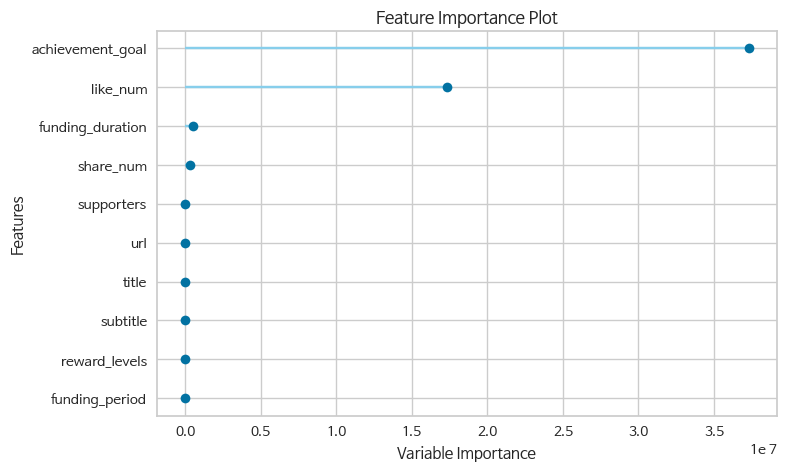

In [ ]:
from pycaret.classification import *

# 데이터를 Pycaret에서 사용할 수 있는 형태로 설정
exp_clf = setup(data = df_autoML, target = 'pick')

# 비교를 위해 다양한 모델 학습
compare_models()

# 가장 성능이 좋은 모델 선택
best_model = automl(optimize = 'Accuracy')

# 변수 중요도를 표시
plot_model(best_model, plot = 'feature')


피처 중요도로는 판단을 하기 어려울 듯 싶다

### pick 이 붙은 것과 안붙은 것의 목표금액 차이가 있을까?

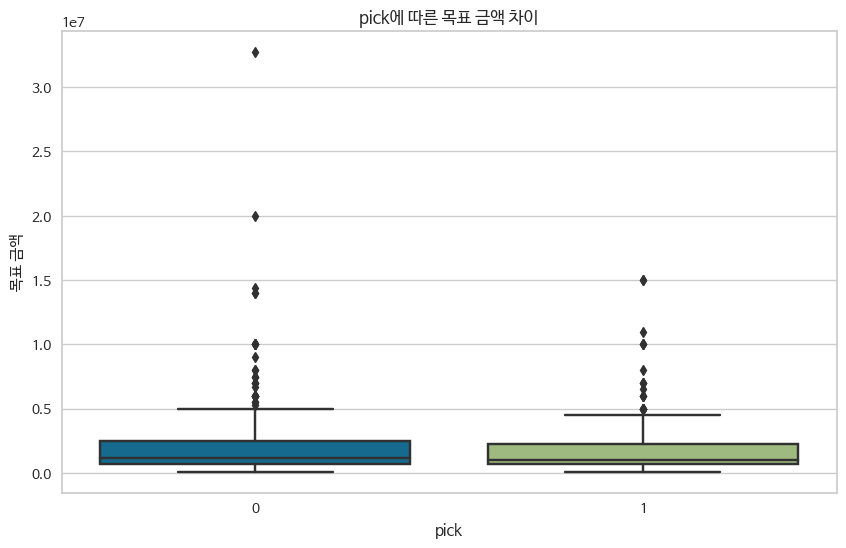

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))

sns.boxplot(x='pick', y='achievement_goal', data=df_magazine)

plt.title('pick에 따른 목표 금액 차이')
plt.xlabel('pick')
plt.ylabel('목표 금액')
plt.show()


#### 로그변환된 boxplot

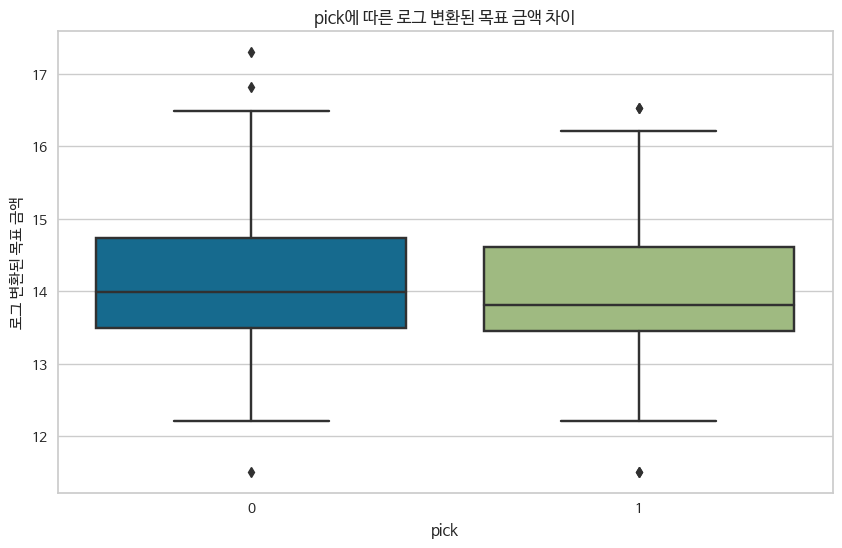

In [ ]:
# achievement_goal 값에 0이 있는지 확인
if (df_magazine['achievement_goal'] == 0).any():
    # 0이 있는 경우, 0을 작은 값으로 대체
    df_magazine.loc[df_magazine['achievement_goal'] == 0, 'achievement_goal'] = 1e-10

# achievement_goal에 로그 변환 적용
df_magazine['log_achievement_goal'] = np.log(df_magazine['achievement_goal'])

plt.figure(figsize=(10,6))

# 로그 변환된 achievement_goal에 대한 boxplot 그리기
sns.boxplot(x='pick', y='log_achievement_goal', data=df_magazine)

plt.title('pick에 따른 로그 변환된 목표 금액 차이')
plt.xlabel('pick')
plt.ylabel('로그 변환된 목표 금액')
plt.show()


#### 이상치 제거된 boxplot

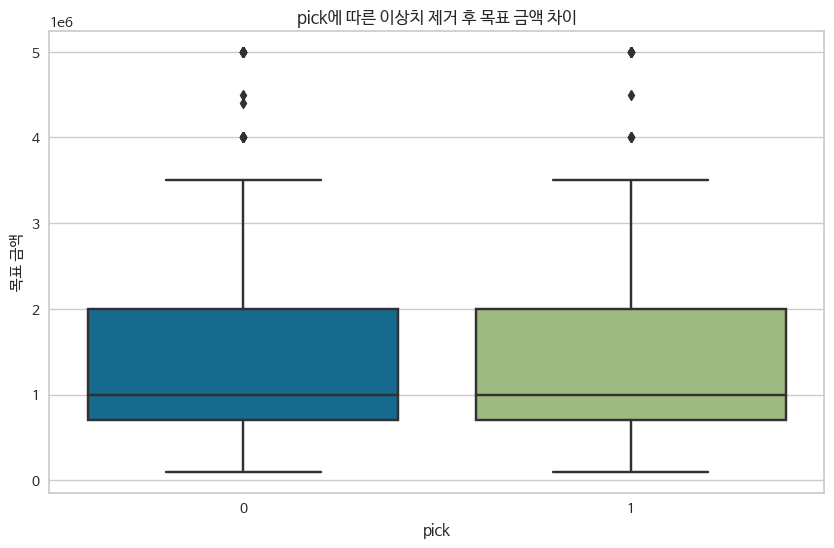

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# IQR을 이용한 이상치 제거
Q1 = df_magazine['achievement_goal'].quantile(0.25)
Q3 = df_magazine['achievement_goal'].quantile(0.75)
IQR = Q3 - Q1

filter = (df_magazine['achievement_goal'] >= Q1 - 1.5 * IQR) & (df_magazine['achievement_goal'] <= Q3 + 1.5 *IQR)
df_filtered = df_magazine.loc[filter]

# 이상치 제거 후 boxplot
plt.figure(figsize=(10,6))
sns.boxplot(x='pick', y='achievement_goal', data=df_filtered)

plt.title('pick에 따른 이상치 제거 후 목표 금액 차이')
plt.xlabel('pick')
plt.ylabel('목표 금액')
plt.show()


# 3. 카테고리별 평균에 대한 분석
앱 · 웹 서비스,잡지,실용 · 취미에 대한 평균 목표 금액을 확인해 본다

In [ ]:
categories = ['앱 · 웹 서비스', '잡지', '실용 · 취미']

for category in categories:
    # 해당 카테고리의 'achievement_goal' 값들의 평균 계산
    avg_goal = df[df['category'] == category]['achievement_goal'].mean()
    print(f"{category} 카테고리의 평균 목표 금액은 {avg_goal:.2f}입니다.")


앱 · 웹 서비스 카테고리의 평균 목표 금액은 2309090.91입니다.
잡지 카테고리의 평균 목표 금액은 2093736.19입니다.
실용 · 취미 카테고리의 평균 목표 금액은 1444263.77입니다.
